# Capstone: Building AI-Powered Solutions

### 1. Task Automation with Supervised Learning 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

In [94]:
# User Story 1: Predicting Exam Success (Supervised Learning - Classification)

# Example dataset
np.random.seed(42)
n_students = 100
study_hours = np.random.randint(1, 10, n_students)
past_scores = np.random.randint(30, 100, n_students)
pass_threshold = 65  # Example threshold
labels = ((study_hours * 2) + (past_scores * 0.7)) > pass_threshold  # Pass
labels = labels.astype(int)

data = pd.DataFrame({'study_hours': study_hours, 'past_scores': past_scores, 'pass': labels})
X = data[['study_hours', 'past_scores']]
y = data['pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Classification Test Results:")
print(classification_report(y_test, y_pred))

Classification Test Results:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.78      0.88         9

    accuracy                           0.90        20
   macro avg       0.92      0.89      0.90        20
weighted avg       0.92      0.90      0.90        20



In [95]:
# Mini-Application

def predict_passing(hours, scores):
    dat = scaler.transform(np.array([[hours, scores]]))

    result = (model.predict(dat)[0])

    if result != 0:
        print("You will likely pass.")
        return
    
    print("You may not pass, based on your current study hours and past performance.")

def predict_passing_interactive():
    hours = input("What are your current study hours?: ")
    scores = input("What is the average of your past scores?: ")

    predict_passing(hours, scores)

predict_passing(10, 70)

# predict_passing_interactive() # Uncomment to test

You will likely pass.


### 2. Clustering for Student Grouping

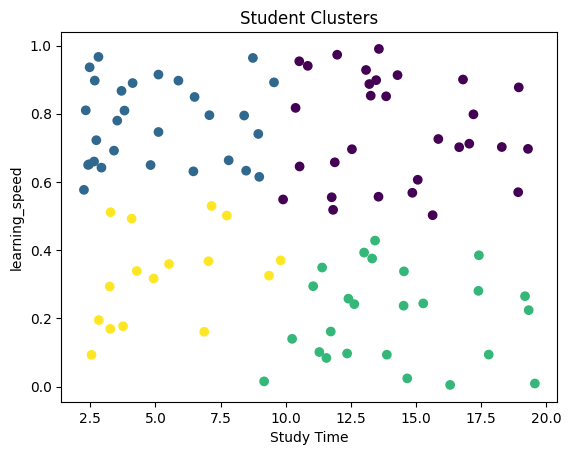

In [96]:
# User Story 2: Clustering Students Based on Learning Styles (Unsupervised Learning)

# Example dataset
n_students = 100
learning_speed = np.random.uniform(0, 1, n_students)
study_time = np.random.uniform(2, 20, n_students)

data_clustering = pd.DataFrame({'learning_speed': learning_speed, 'study_time': study_time})
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering.values)

num_clusters = 4 # 4 groups of students
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data_clustering['cluster'] = kmeans.fit_predict(data_scaled)

# Visualizing Clusters
plt.scatter(data_clustering['study_time'], data_clustering['learning_speed'], c=data_clustering['cluster'], cmap='viridis')
plt.xlabel('Study Time')
plt.ylabel('learning_speed')
plt.title('Student Clusters')
plt.show()


In [97]:
# Examine groups found

cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

for i in range(4):
    print(f"Cluster {i} average: {cluster_centers[i]}")

Cluster 0 average: [0.69560521 0.78218265]
Cluster 1 average: [ 0.76096632 -0.97450125]
Cluster 2 average: [-1.21007703  0.77644159]
Cluster 3 average: [-0.79276587 -0.91349892]


Our synthetic data produces four clusters of students, depending on the relation between study time and student learning speed.

In [ ]:
# Mini-Application

def get_student_type(learning_rate, study_hours):
    dat = scaler.transform(np.array([[learning_rate, study_hours]]))

    result = (kmeans.predict(dat)[0])

    print("Student type is: " + str(result))

get_student_type(0.1, 2)  # Learns slowly, doesn't study much
get_student_type(1, 2)    # Learns fast, doesn't study much
get_student_type(0.1, 20) # Learns slowly but studies alot
get_student_type(1, 20)   # Learns fast and studies alot

Student type is: 3
Student type is: 1
Student type is: 2
Student type is: 0


In [99]:
def get_student_type_interactive():
    lr = input("What is your estimated learning rate? (0-1): ")
    hrs = input("What is the average of your hours studied?: ")

    get_student_type(lr, hrs)

# get_student_type_interactive() # Uncomment to test